# Prétraitement des données

## Suppression des éléments indésirables de nos tweets

In [2]:
# Imports nécessaires
import pandas as pd
import numpy as np
import string 
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from nltk.stem import WordNetLemmatizer

In [6]:
# Lecture et stockage de la base de données
#tweet_df = pd.read_pickle('../../raw_data/final4_clean.csv')
tweet_df.head()
new_test_df = pd.read_pickle('../../raw_data/update_age_sex')

In [4]:
y = np.arange(0, tweet_df.shape[0])
tweet_df['index'] = y
tweet_df.set_index('index', inplace=True)

In [5]:
# Remove the undesirable elements in the entire dataframe
def rmurl_df(df, column_name):
    '''
    This function removes all the URLs, the #hashtag and the @user of a column made of strings.
    Be careful to apply it BEFORE all the other preprocessing steps (if not it wont'
    be recognized as a URL)
    '''
    df = df.copy()
    df[column_name] = df[column_name].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
    return df



In [6]:
# Lowercase the tweet's column
def lower_df(df, column_name):
    '''
    This function lowercases a column made of strings.
    '''
    df = df.copy()
    df[column_name] = df[column_name].str.lower()
    return df

In [7]:
# Remove the numbers in the tweet's column
def rmnumbers_df(df, column_name):
    '''
    This function removes all the digits of a column made of strings.
    '''
    df = df.copy()
    def remove_numbers(text):
        return ''.join(word for word in text if not word.isdigit())
    df[column_name] = df[column_name].apply(remove_numbers)
    return df

In [8]:
# Remove the undesirable punctuations in the tweet's column
def rmpunct_df(df, column_name):
    '''
    This function removes all the punctuations, all the "rt" and remove multiple spaces
    of a column made of strings.
    '''
    punct = string.punctuation
    df = df.copy()
    def replace_punct(text):
        for punctu in punct:
            text = text.replace(punctu, ' ')
        text = text.replace(' rt ','')
        text = " ".join(text.split())
        return text
    df[column_name] = df[column_name].apply(replace_punct)
    return df

In [9]:
# Remove the stopwords in the tweet's column
def rmstopwords_df(df, column_name):
    '''
    This function removes all the stopwords of a column made of strings.
    '''
    df = df.copy()
    stop_words = stopwords.words('english')
    def remove_stopwords(text):
        for word in stop_words:
            text = text.replace(f' {word} ', ' ')
        return text
    df[column_name] = df[column_name].apply(remove_stopwords)
    return df

In [10]:
# Lemmatize a column in a dataset
def lemmatize_df(df, column_name):
    '''
    This function lemmatize the words of a column made of strings.
    '''
    df = df.copy()
    def lemmatize(text):
        lemmatizer = WordNetLemmatizer()
        retour = []
        for word in text:
            retour.append(lemmatizer.lemmatize(word))
        text = ''.join(word for word in retour)
        return text

    df[column_name] = df[column_name].apply(lemmatize)
    return df

In [11]:
# Erase all the words that are 1-letter or 2-letters long
def erase_fewletter_df(df, column_name):
    '''
    One or two letters words are deleted from the dataset.
    '''
    df = df.copy()
    def tester(text):
        text = ' '.join( [w for w in text.split() if len(w)>2] )
        return text

    df[column_name] = df[column_name].apply(tester)
    return df


In [12]:
# Remove the undesirable emojis in the entire dataframe
def rmemojis_df(df):
    '''
    This function removes all the emojis of a column made of strings.
    Be careful to translate in latin alphabet before applying this function : 
    it also removes cyrillic alphabet
    '''
    df = df.copy()
    df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
    return df

In [13]:
clean_df = rmurl_df(new_test_df, 'content')
clean_df = lower_df(clean_df, 'content')
clean_df = rmnumbers_df(clean_df, 'content')
clean_df = rmpunct_df(clean_df, 'content')
clean_df = rmstopwords_df(clean_df, 'content')
clean_df = lemmatize_df(clean_df, 'content')
clean_df = erase_fewletter_df(clean_df, 'content')
clean_df = rmemojis_df(clean_df)

In [14]:
clean_df

,mep_id,name,country,group,nat_group,twitter,content,age,sex
0,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,bardzo dzikuj niezalene wadzy wolne media daj ...,47,1.0
1,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,komisja przyja arcywane projekty pilotaowe aut...,47,1.0
2,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,komisja przyja projekty pilotaowe mojego wspau...,47,1.0
3,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,tym dniu tym miejscu tej godzinie prosz jedno ...,47,1.0
4,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,bg nie potrzebuje by przez nikogo broniony nie...,47,1.0
...,...,...,...,...,...,...,...,...,...
137295,96933,Milan ZVER,Slovenia,Group of the European People's Party (Christia...,Slovenska demokratska stranka,MilanZver,tedenska akcija etrtka srede zbornik bela knji...,63,0.0
137296,96933,Milan ZVER,Slovenia,Group of the European People's Party (Christia...,Slovenska demokratska stranka,MilanZver,strong amp way forward european future read eu...,63,0.0
137297,96933,Milan ZVER,Slovenia,Group of the European People's Party (Christia...,Slovenska demokratska stranka,MilanZver,date noted worrying state danger ends special ...,63,0.0
137298,96933,Milan ZVER,Slovenia,Group of the European People's Party (Christia...,Slovenska demokratska stranka,MilanZver,vsi vedo nekaj noro strahu pred nasilnimi levi...,63,0.0


In [15]:
testbase_df = clean_df[clean_df['country'] == 'Ireland']
testbase_deputy_df = tweet_df[tweet_df['country'] == 'Ireland']

## Création du modèle

### Traitement des données d'entraînement et de test

In [16]:
# Cette fonction retourne automatiquement X_train, X_test, y_train, y_test de notre base de données twitter.
def get_train_test_objects(df):
    '''
    Les étapes que cette fonction réalise sont en commentaires.
    '''
    # Copie de la base de données pour éviter les problèmes d'assignation abusive.
    df = df.copy() 
    # Récupération de tous les tweets et du nom du député qui les a posté. Création de la cible y.
    df = df[['name', 'content']]
    y = pd.get_dummies(df['name'])
    # Transformation des tweets en suite de mots (strings) dans une liste.
    sentences = df['content']
    sentences_inter = []
    for sentence in sentences:
        sentences_inter.append(sentence.split())
    # Séparation des données d'entraînement et de test
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences_inter, y, test_size = 0.3)
    # Vectorisation des phrases
    word2vec = Word2Vec(sentences=sentences_train)
    # Création des données d'entrée.
    X_train = embedding(word2vec,sentences_train)
    X_test = embedding(word2vec,sentences_test)
    X_train_pad = pad_sequences(X_train, padding='post',value=-1000, dtype='float32')
    X_test_pad = pad_sequences(X_test, padding='post',value=-1000, dtype='float32')
    # Création des données cibles.
    y_train = y_train.values
    y_test = y_test.values
    # Sorties de la fonction
    return X_train_pad, y_train, X_test_pad, y_test, word2vec

In [17]:
def embed_sentence(word2vec, sentence):
    y = []
    for word in sentence:
        if word in word2vec.wv.vocab.keys():
           y.append(word2vec[word])
    return np.array(y)

def embedding(word2vec, sentences):
    
    y = []
    for sentence in sentences:
        y.append(embed_sentence(word2vec, sentence))
    return y

In [18]:
X_train, y_train, X_test, y_test, word2vec = get_train_test_objects(testbase_df)

c:\users\psmag\.venvs\delphes\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [19]:
X_train.shape

(2100, 28, 100)

### Initiation du modèle

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def init_model():

    model = Sequential()
    model.add(layers.Masking(mask_value = -1000))
    model.add(layers.LSTM(13, activation='tanh'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    return model


### Entraînement du modèle et évaluation

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 100, monitor='val_loss', restore_best_weights=True)
model = init_model()
model.fit(X_train, y_train, batch_size = 8, epochs=1000, validation_split = 0.3, callbacks = [es])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1470 samples, validate on 630 samples
Epoch 1/1000
1470/1470 [==============================] - 8s 6ms/sample - loss: 2.3025 - acc: 0.1061 - val_loss: 2.3024 - val_acc: 0.0889
Epoch 2/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.2993 - acc: 0.1034 - val_loss: 2.2971 - val_acc: 0.0905
Epoch 3/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.2879 - acc: 0.1252 - val_loss: 2.2920 - val_acc: 0.1540
Epoch 4/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.2735 - acc: 0.1381 - val_loss: 2.2675 - val_acc: 0.1238
Epoch 5/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.2617 - acc: 0.1435 - val_loss: 2.2535 - val_acc: 0.1381
Epoch 6/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.2527 -

Epoch 55/1000
1470/1470 [==============================] - 7s 5ms/sample - loss: 2.1492 - acc: 0.2102 - val_loss: 2.2284 - val_acc: 0.1841
Epoch 56/1000
1470/1470 [==============================] - 8s 5ms/sample - loss: 2.1510 - acc: 0.2027 - val_loss: 2.2547 - val_acc: 0.1714
Epoch 57/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.1466 - acc: 0.2163 - val_loss: 2.2573 - val_acc: 0.1841
Epoch 58/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.1480 - acc: 0.2054 - val_loss: 2.2201 - val_acc: 0.1746
Epoch 59/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.1446 - acc: 0.2048 - val_loss: 2.2430 - val_acc: 0.1651
Epoch 60/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.1484 - acc: 0.2014 - val_loss: 2.2225 - val_acc: 0.1810
Epoch 61/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.1407 - acc: 0.2136 - val_loss: 2.2437 - val_acc: 0.1698 loss: 2.1440 - ac
Epoch 62/

Epoch 114/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.0899 - acc: 0.2333 - val_loss: 2.2601 - val_acc: 0.1762
Epoch 115/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.0861 - acc: 0.2395 - val_loss: 2.2712 - val_acc: 0.1778
Epoch 116/1000
1470/1470 [==============================] - 6s 4ms/sample - loss: 2.0879 - acc: 0.2293 - val_loss: 2.3003 - val_acc: 0.1794
Epoch 117/1000
1470/1470 [==============================] - 7s 5ms/sample - loss: 2.0894 - acc: 0.2340 - val_loss: 2.2726 - val_acc: 0.1794
Epoch 118/1000
1470/1470 [==============================] - 8s 5ms/sample - loss: 2.0880 - acc: 0.2333 - val_loss: 2.2890 - val_acc: 0.1873
Epoch 119/1000
1470/1470 [==============================] - 8s 5ms/sample - loss: 2.0847 - acc: 0.2320 - val_loss: 2.2643 - val_acc: 0.1714
Epoch 120/1000
1470/1470 [==============================] - 7s 4ms/sample - loss: 2.0907 - acc: 0.2442 - val_loss: 2.2782 - val_acc: 0.1683
Epoch 121/1000
1470/

In [59]:
model.evaluate(X_test, y_test)

900/900 [==============================] - 0s 122us/sample - loss: 2.2132 - acc: 0.1800


[2.213210598627726, 0.18]

In [21]:
# Renvoie le député le plus proche de votre tweet
def predict_deputy(df, model, tweet, by_tweet = False):
    '''
    La fonction prend la base de données originale (par député), un modèle entraîné et un texte en entrée.
    Elle renvoie le député le plus proche du texte proposé.
    Attention : le texte en entrée doit être une liste d'au moins deux éléments (strings).
    Quand by_tweet = False, on ressort le député le plus proche de l'ENSEMBLE des tweets.
    Quand by_tweet = True, on sort le député le plus proche POUR CHAQUE tweet.
    '''
    tweet_inter = []
    for tw in tweet:
        tweet_inter.append(tw.split())
    X_example = embedding(word2vec,tweet_inter)
    X_example_pad = pad_sequences(X_example, padding='post',value=-1000, dtype='float32')
    prediction = model.predict(X_example_pad)
    if not by_tweet:
        deputy = list(df['name'])[prediction.sum(axis=0).argmax()]
        return deputy
    else:
        deputies_by_tweet = []
        for element in prediction:
            deputies_by_tweet.append(list(df['name'])[element.argmax()])
        return deputies_by_tweet

In [61]:
prediction = predict_deputy(testbase_deputy_df,
                            model, 
                            ['the northern ireland protocol must protected line real effort must made earnest week bridge gap talks come table many times good faith amp view securing future partnership respects standards union', 
                             'member special committee beating cancer look forward working members contributing important fight cancer',
                             'this month shining light childrens cancer parliament buildings lit gold highlight survivors childrens cancer well diagnosed cancer'], 
                            by_tweet=False)

c:\users\psmag\.venvs\delphes\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [62]:
prediction

'Luke Ming FLANAGAN'

In [63]:
testbase_df['content'][24724]

'this month shining light childrens cancer parliament buildings lit gold highlight survivors childrens cancer well diagnosed cancer'

In [64]:
testbase_df

,mep_id,name,country,group,nat_group,twitter,content
24722,124988,Deirdre CLUNE,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,deirdreclunemep,the northern ireland protocol must protected l...
24723,124988,Deirdre CLUNE,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,deirdreclunemep,member special committee beating cancer look f...
24724,124988,Deirdre CLUNE,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,deirdreclunemep,this month shining light childrens cancer parl...
24725,124988,Deirdre CLUNE,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,deirdreclunemep,yesterday told europe need keep speed amp infr...
24726,124988,Deirdre CLUNE,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,deirdreclunemep,this letter sent taoiseach clear seeking clari...
...,...,...,...,...,...,...,...
130490,197863,Maria WALSH,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,mariawalsheu,brendan its favourite item desk
130491,197863,Maria WALSH,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,mariawalsheu,monday mornings mean tidy desk chaos ahead wee...
130492,197863,Maria WALSH,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,mariawalsheu,fergal post kick new week thank folks like mak...
130493,197863,Maria WALSH,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,mariawalsheu,it took rare vision unique leadership see beyo...


# Bac à sable

In [104]:
danish_df = pd.read_pickle('../../delphes/data/six_merged')
#inter_df = pd.merge(danish_df, clean_df.reset_index()[['index','age', 'sex']], on='index')

In [106]:
danish_df

,index,mep_id,name,country,group,nat_group,twitter,content,age,sex,content_y
0,836,125045,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,ClaraAguilera7,"Clara Aguilera: ""El criterio científico debe p...",56,1.0,"[[0.0403111, 0.0812186, -0.0355939, 0.0331782,..."
1,837,125045,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,ClaraAguilera7,🇪🇺🎊🎊🎊as @EUfoodforum we are super proud that o...,56,1.0,"[[-0.0436824, -0.0149531, -0.0435268, 0.025988..."
2,838,125045,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,ClaraAguilera7,"Clara Aguilera: ""El criterio científico debe p...",56,1.0,"[[0.0403111, 0.0812186, -0.0355939, 0.0331782,..."
3,839,125045,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,ClaraAguilera7,"🗣️ @ClaraAguilera7: ""El criterio científico de...",56,1.0,"[False, [-0.0675644, 0.0040941, -0.0185521, 0...."
4,840,125045,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,ClaraAguilera7,Última hora: Bélgica sitúa a toda España en ro...,56,1.0,"[False, [0.0225546, 0.0994218, -0.0251348, -0...."
...,...,...,...,...,...,...,...,...,...,...,...
37387,136695,124739,Carlos ZORRINHO,Portugal,Group of the Progressive Alliance of Socialist...,Partido Socialista,czorrinho,Dia 12.05.2020\n18h\n9Temas 9Debates 9Deputad@...,40,0.0,"[False, False, False, False, False, False, Fal..."
37388,136696,124739,Carlos ZORRINHO,Portugal,Group of the Progressive Alliance of Socialist...,Partido Socialista,czorrinho,Uma entrevista notável ... recomendo. https://...,40,0.0,"[[-0.0529539, 0.00473264, -0.00307722, 0.00865..."
37389,136697,124739,Carlos ZORRINHO,Portugal,Group of the Progressive Alliance of Socialist...,Partido Socialista,czorrinho,Comemorar a Europa dos Valores https://t.co/dz...,40,0.0,"[[-0.0290561, 0.00908396, 0.0969392, 0.0101425..."
37390,136698,124739,Carlos ZORRINHO,Portugal,Group of the Progressive Alliance of Socialist...,Partido Socialista,czorrinho,#EuropeDay2020 #TheProgressives\n@PedroMarques...,40,0.0,[False]


In [133]:
working_df = danish_df[['sex','content_y']].dropna().reset_index()

In [134]:
working_df

,index,sex,content_y
0,0,1.0,"[[0.0403111, 0.0812186, -0.0355939, 0.0331782,..."
1,1,1.0,"[[-0.0436824, -0.0149531, -0.0435268, 0.025988..."
2,2,1.0,"[[0.0403111, 0.0812186, -0.0355939, 0.0331782,..."
3,3,1.0,"[False, [-0.0675644, 0.0040941, -0.0185521, 0...."
4,4,1.0,"[False, [0.0225546, 0.0994218, -0.0251348, -0...."
...,...,...,...
37154,37387,0.0,"[False, False, False, False, False, False, Fal..."
37155,37388,0.0,"[[-0.0529539, 0.00473264, -0.00307722, 0.00865..."
37156,37389,0.0,"[[-0.0290561, 0.00908396, 0.0969392, 0.0101425..."
37157,37390,0.0,[False]


In [135]:
working_df['content_y'].shape[0]

37159

In [136]:
type(working_df['content_y'][0][4])

bool

In [137]:
new_items = [x if type(x) == np.ndarray else np.array([-1000]*100) for x in working_df['content_y'][4]]

In [138]:
new_items

[array([-1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
        -1000]),
 array([ 0.0225546 ,  0.0994218 , -0.0251348 , -0.104368  , -0.00467696,
         0.0161251 , -0.0264484 , -0.0260037 ,  0.024174  ,  0.0232939 ,
         0.0372348 , -0.122873  ,  0.0492365 ,  0.023681

In [139]:
for i in range(working_df['content_y'].shape[0]):
    working_df['content_y'][i] = [x if type(x) == np.ndarray else np.array([-1000.5]*300) for x in working_df['content_y'][i]]

c:\users\psmag\.venvs\delphes\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
working_df = working_df[['sex', 'content_y']]
working_df.rename(columns={"content_y": "content"}, inplace=True)

c:\users\psmag\.venvs\delphes\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
X = working_df[['content']]

In [142]:
y = working_df['sex']
X_train2, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# Création des données cibles.
y_train = y_train.values
y_test = y_test.values

In [143]:
def treating_X(X):
    X = X.reset_index().drop('index', axis=1)
    maxi = 0
    for i in range(len(X['content'])):
        if len(X['content'][i]) > maxi:
            maxi = len(X['content'][i])
    c = np.zeros((X.shape[0], maxi, 300))
    i = 0
    for element in X['content']:
        a_len = len(element)
        a = np.array(element)
        c[i][:a_len] = a
        i+=1
    return c

In [144]:
#c = treating_X(X_train2)
c_test = treating_X(X_test)

MemoryError: Unable to allocate 1.45 GiB for an array with shape (11148, 58, 300) and data type float64

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
def init_model():

    model = Sequential()
    model.add(layers.Masking(mask_value = 0))
    model.add(layers.LSTM(100, dropout=0.25, recurrent_dropout=0.25, activation='tanh'))
    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    return model

In [120]:
c.shape

(26011, 58, 300)

In [121]:
y_train

array([0., 1., 0., ..., 0., 1., 0.])

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, monitor='val_loss', restore_best_weights=True)
model = init_model()
model.fit(c, y_train, batch_size = 32, epochs=1000, validation_split = 0.3, callbacks = [es])

Train on 18207 samples, validate on 7804 samples
Epoch 1/1000
18207/18207 [==============================] - 123s 7ms/sample - loss: 0.6905 - acc: 0.5476 - val_loss: 0.6869 - val_acc: 0.5645
Epoch 2/1000
18207/18207 [==============================] - 116s 6ms/sample - loss: 0.6879 - acc: 0.5517 - val_loss: 0.6985 - val_acc: 0.5645
Epoch 3/1000
18207/18207 [==============================] - 113s 6ms/sample - loss: 0.6877 - acc: 0.5551 - val_loss: 0.6858 - val_acc: 0.5645
Epoch 4/1000
18207/18207 [==============================] - 110s 6ms/sample - loss: 0.6871 - acc: 0.5574 - val_loss: 0.6861 - val_acc: 0.5642
Epoch 5/1000
18207/18207 [==============================] - 106s 6ms/sample - loss: 0.6852 - acc: 0.5596 - val_loss: 0.6855 - val_acc: 0.5643
Epoch 6/1000
18207/18207 [==============================] - 106s 6ms/sample - loss: 0.6838 - acc: 0.5585 - val_loss: 0.6899 - val_acc: 0.5639
Epoch 7/1000
11296/18207 [=================>............] - ETA: 32s - loss: 0.6817 - acc: 0.5678

KeyboardInterrupt: 

In [100]:
model.evaluate(c_test, y_test)

11148/11148 [==============================] - 16s 1ms/sample - loss: 0.4793 - acc: 0.8167


[0.47929147977661307, 0.8167384]

### Record à 16.36% avec ce modèle

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
def init_model():

    model = Sequential()
    model.add(layers.Masking(mask_value = 0))
    model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dense(y_train.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    return model

In [299]:
model_record = model

# Traitement de la base de données finale

In [7]:
all_countries = pd.read_hdf('../../raw_data/full_mean_df_hdf.h5', 'h5').dropna()

In [8]:
all_countries

,mep_id,name,country,group,nat_group,twitter,content,lang,0,1,...,290,291,292,293,294,295,296,297,298,299
0,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,bardzo dziękuję niezależne od władzy wolne med...,polish,-0.012661,0.002554,...,0.007531,-0.041275,0.029452,0.030989,0.010538,-0.049243,-0.025033,0.058314,0.019128,0.022892
1,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,komisja przyjęła arcyważne projekty pilotażowe...,polish,-0.018363,0.009202,...,0.010615,-0.039067,0.031028,0.025055,0.008500,-0.053187,-0.030836,0.053642,0.019144,0.015897
2,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,komisja przyjęła projekty pilotażowe mojego ws...,polish,-0.019916,0.006455,...,0.005200,-0.037808,0.030887,0.027038,0.009016,-0.054631,-0.028361,0.054603,0.024452,0.018427
3,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,w tym dniu w tym miejscu w tej godzinie proszę...,polish,-0.010152,0.005874,...,0.016721,-0.040829,0.033006,0.023900,0.013247,-0.052095,-0.029642,0.054064,0.021562,0.014025
4,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,bóg nie potrzebuje być przez nikogo broniony i...,polish,-0.017805,0.005459,...,0.012571,-0.039137,0.037016,0.028174,0.013037,-0.056093,-0.035508,0.053920,0.019459,0.015463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137295,197652,Angelika WINZIG,Austria,Group of the European People's Party (Christia...,Österreichische Volkspartei,AngelikaWinzig,italiens budgetpolitik gefährdet nicht nur ita...,german,-0.032662,-0.020359,...,-0.006590,-0.010474,0.038501,0.017754,-0.031848,-0.114873,-0.063869,-0.001768,0.014983,0.010953
137296,197652,Angelika WINZIG,Austria,Group of the European People's Party (Christia...,Österreichische Volkspartei,AngelikaWinzig,danke martin für die organisation des eu somme...,german,-0.035984,-0.029438,...,-0.009227,-0.008789,0.036854,0.021920,-0.032733,-0.112913,-0.060042,-0.002471,0.018086,0.008367
137297,197652,Angelika WINZIG,Austria,Group of the European People's Party (Christia...,Österreichische Volkspartei,AngelikaWinzig,tadition amp moderne top betriebe netzwerktref...,german,-0.028948,-0.023442,...,-0.006545,-0.011271,0.042163,0.016308,-0.039746,-0.117086,-0.060991,-0.004830,0.018593,0.007534
137298,197652,Angelika WINZIG,Austria,Group of the European People's Party (Christia...,Österreichische Volkspartei,AngelikaWinzig,hier mein statement zur budgetrede von finanzm...,german,-0.034614,-0.024161,...,-0.010266,-0.012133,0.036686,0.015777,-0.028820,-0.107009,-0.058627,0.000139,0.018164,0.005121


In [23]:
test = np.arange(0,300,1)
herbe = all_countries[test]
y = pd.get_dummies(all_countries['name'])


In [24]:

X_train3, X_test, y_train, y_test = train_test_split(herbe, y, test_size = 0.3)
# Création des données cibles.
y_train = y_train.values
y_test = y_test.values
X_train3 = np.array(X_train3)
X_test = np.array(X_test)

In [25]:
from tensorflow.keras import backend
backend.clear_session()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
def init_model():

    model = Sequential()
    #model.add(layers.GRU(units=27, activation='tanh'))
    #model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(y_train.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    return model

In [27]:
X_train3.shape

(80959, 300)

In [28]:
y_train.shape

(80959, 407)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, monitor='val_loss', restore_best_weights=True)
model = init_model()
model.fit(X_train3, y_train, batch_size = 32, epochs=1000, validation_split = 0.3, callbacks = [es])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 56671 samples, validate on 24288 samples
Epoch 1/1000
56671/56671 [==============================] - 6s 98us/sample - loss: 4.0338 - acc: 0.0456 - val_loss: 3.5744 - val_acc: 0.0499
Epoch 2/1000
56671/56671 [==============================] - 5s 94us/sample - loss: 3.5408 - acc: 0.0550 - val_loss: 3.5132 - val_acc: 0.0600
Epoch 3/1000
56671/56671 [==============================] - 5s 94us/sample - loss: 3.4904 - acc: 0.0647 - val_loss: 3.4742 - val_acc: 0.0620
Epoch 4/1000
56671/56671 [==============================] - 5s 94us/sample - loss: 3.4554 - acc: 0.0691 - val_loss: 3.4517 - val_acc: 0.0692
Epoch 5/1000
56671/56671 [==============================] - 5s 93us/sample - loss: 3.4308 - acc: 0.0725 - val_loss: 3.4397 - val_acc: 0.0728
Epoch 6/1000
56671/56671 [==============================] - 5s 94us/sample - loss: 3.4107 - acc: 0.0781 - val_loss: 3.4303 - val_acc: 0.0725
Epoch 7/1000
56671/5667

In [30]:
model.evaluate(X_test, y_test)

34697/34697 [==============================] - 1s 33us/sample - loss: 3.3466 - acc: 0.1072


[3.3466045982292014, 0.10721388]

In [65]:
X_test

array([[-0.02825846, -0.00807517,  0.00644887, ..., -0.03742201,
         0.05484787,  0.04415101],
       [-0.03325021, -0.00806143,  0.01206364, ...,  0.02528561,
         0.0566374 ,  0.03425712],
       [-0.07518935, -0.00543462, -0.04191901, ...,  0.0275893 ,
         0.04967278, -0.02223074],
       ...,
       [-0.02677996, -0.02366158,  0.00134976, ..., -0.01088172,
         0.01706354,  0.01241548],
       [-0.05917423, -0.00543494, -0.03917916, ...,  0.02934626,
         0.05161303, -0.02438935],
       [-0.03031913, -0.0233132 ,  0.00377599, ..., -0.00220552,
         0.01967163,  0.00577335]])

In [34]:
import matplotlib.pyplot as plt

In [36]:
loss = model.history.history['loss']
acc = model.history.history['acc']
val_loss = model.history.history['val_loss']
val_acc = model.history.history['val_acc']

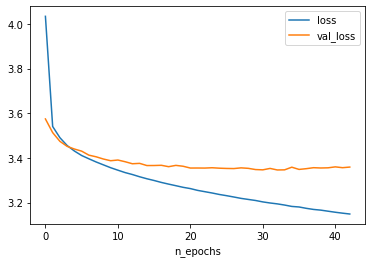

In [46]:
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('n_epochs')
plt.legend()

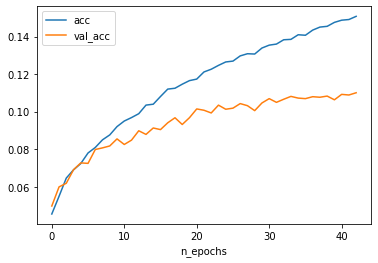

In [49]:
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('n_epochs')
plt.legend()

In [58]:
herbe.loc[0,:]

0     -0.012661
1      0.002554
2     -0.014151
3      0.012570
4     -0.028476
         ...   
295   -0.049243
296   -0.025033
297    0.058314
298    0.019128
299    0.022892
Name: 0, Length: 300, dtype: float64

In [59]:
# Renvoie le député le plus proche de votre tweet
def predict_tweet(df, model, n_tweet, by_tweet = False):
    '''
    La fonction prend la base de données originale (par député), un modèle entraîné et un numéro de tweet en entrée.
    Elle renvoie le député le plus proche du texte proposé.
    Quand by_tweet = False, on ressort le député le plus proche de l'ENSEMBLE des tweets.
    Quand by_tweet = True, on sort le député le plus proche POUR CHAQUE tweet.
    '''
    test = np.arange(0,300,1)
    herbe = df[test]
    X_example = herbe.loc[n_tweet,:]
    prediction = model.predict(X_example)
    if not by_tweet:
        deputy = list(df['name'])[prediction.sum(axis=0).argmax()]
        return deputy
    else:
        deputies_by_tweet = []
        for element in prediction:
            deputies_by_tweet.append(list(df['name'])[element.argmax()])
        return deputies_by_tweet

In [64]:
    test = np.arange(0,300,1)
    herbe = all_countries[test]
    X_example = herbe.loc[1,:]
    X_example

0     -0.018363
1      0.009202
2     -0.018279
3      0.014551
4     -0.033121
         ...   
295   -0.053187
296   -0.030836
297    0.053642
298    0.019144
299    0.015897
Name: 1, Length: 300, dtype: float64

In [60]:
predict_tweet(all_countries, model, 1)

InvalidArgumentError: Matrix size-incompatible: In[0]: [32,1], In[1]: [300,128]
	 [[{{node sequential/dense/Relu}}]]